In [3]:
import numpy as np
import matplotlib.pyplot as plt

from SALib.sample import saltelli
from SALib.analyze import sobol

In [4]:
def parabola(x,a,b):
    return a+b*x**2

In [5]:
problem ={
    'num_vars': 2,
    'names': ['a','b'],
    'bounds': [[0,1]]*2
}

In [21]:
# sample
param_values = saltelli.sample(problem, 2**6)

# print(param_values)

# evaluate
x = np.linspace(-1, 1, 100)
y = np.array([parabola(x, *params) for params in param_values])

# print(param_values.shape)
# print(y.shape)
# print(y)
# analyse
sobol_indices = [sobol.analyze(problem, Y) for Y in y.T]

print("Sobol Indices")
# print(sobol_indices)

Sobol Indices


C:\Users\Gaming\AppData\Local\Temp\ipykernel_26952\1678471485.py:2: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 2**6)


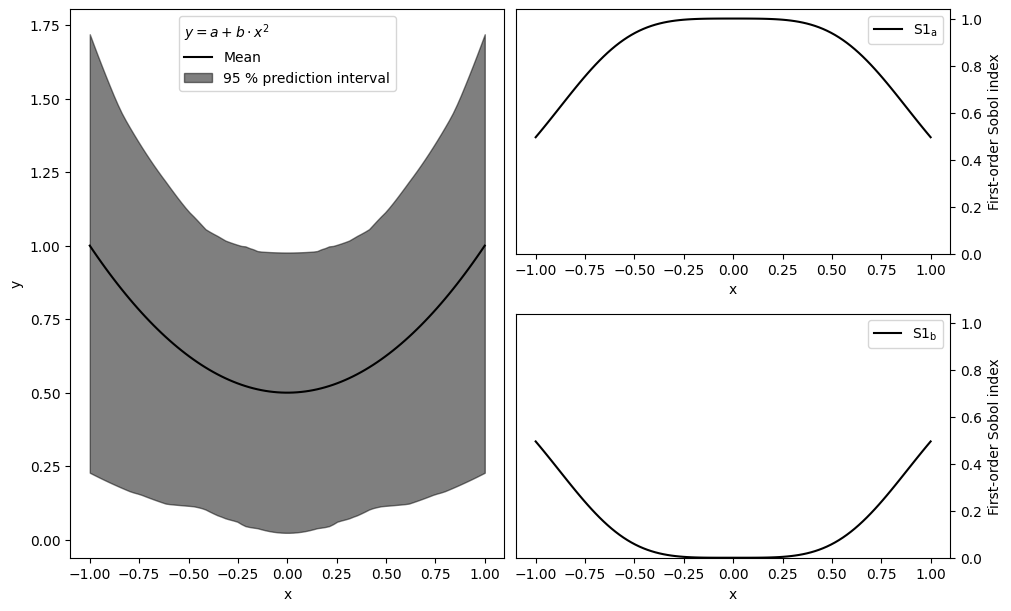

In [18]:
S1s = np.array([s['S1'] for s in sobol_indices])

fig = plt.figure(figsize=(10, 6), constrained_layout=True)
gs = fig.add_gridspec(2, 2)

ax0 = fig.add_subplot(gs[:, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 1])

for i, ax in enumerate([ax1, ax2]):
    ax.plot(x, S1s[:, i],
            label=r'S1$_\mathregular{{{}}}$'.format(problem["names"][i]),
            color='black')
    ax.set_xlabel("x")
    ax.set_ylabel("First-order Sobol index")

    ax.set_ylim(0, 1.04)

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()

    ax.legend(loc='upper right')

ax0.plot(x, np.mean(y, axis=0), label="Mean", color='black')

# in percent
prediction_interval = 95

ax0.fill_between(x,
                 np.percentile(y, 50 - prediction_interval/2., axis=0),
                 np.percentile(y, 50 + prediction_interval/2., axis=0),
                 alpha=0.5, color='black',
                 label=f"{prediction_interval} % prediction interval")

ax0.set_xlabel("x")
ax0.set_ylabel("y")
ax0.legend(title=r"$y=a+b\cdot x^2$",
           loc='upper center')._legend_box.align = "left"

plt.show()

In [8]:
# print(sobol_indices)

[{'S1': array([0.49526584, 0.49526584]), 'S1_conf': array([0.21082268, 0.1925159 ]), 'ST': array([0.49745084, 0.49672251]), 'ST_conf': array([0.17336893, 0.16624962]), 'S2': array([[       nan, 0.00436999],
       [       nan,        nan]]), 'S2_conf': array([[      nan, 0.3809485],
       [      nan,       nan]])}, {'S1': array([0.51556371, 0.47500552]), 'S1_conf': array([0.21423845, 0.18875277]), 'ST': array([0.5177469 , 0.47646098]), 'ST_conf': array([0.14736765, 0.1598662 ]), 'S2': array([[       nan, 0.00436638],
       [       nan,        nan]]), 'S2_conf': array([[       nan, 0.40516033],
       [       nan,        nan]])}, {'S1': array([0.53622373, 0.45439983]), 'S1_conf': array([0.20676751, 0.18184713]), 'ST': array([0.53840136, 0.45585158]), 'ST_conf': array([0.15815009, 0.15119732]), 'S2': array([[       nan, 0.00435525],
       [       nan,        nan]]), 'S2_conf': array([[       nan, 0.39561703],
       [       nan,        nan]])}, {'S1': array([0.55718747, 0.43350793]), 